---

<center>

# **12 Steps to Navier-Stokes**

<center>

---


## Step 11: Cavity Flow with Navier–Stokes

---

In this notebook we'll solve Navier-Stokes in two-dimensional space to simulate the flow of an incompressible fluid inside a square cavity (e.g **lid-driven cavity**), before setting up that problem (defined by BC's) we will tackle ***the discretization of the governing equations***.

The **momentum equation in vector form for a velocity field $\vec{v}$** is

$$\frac{\partial \vec{v}}{\partial t}+(\vec{v}\cdot\nabla)\vec{v}=-\frac{1}{\rho}\nabla p + \nu \nabla^2\vec{v}$$

This represents three scalar equations, one for each velocity component $(u,v,w)$. But we will solve it **in two dimensions**, so **there will be two scalar equations**

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right) $$


$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right) $$

then the equation that relates pressure, **the Poisson's equation**

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = -\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)$$

Then the **discretization** of the three equations

* **$u$ momentum equation**

$$\frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y} =  
 -\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x}+\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right)
$$

* **$v$ momentum equation**

$$
\frac{v_{i,j}^{n+1}-v_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta y} =
 -\frac{1}{\rho}\frac{p_{i,j+1}^{n}-p_{i,j-1}^{n}}{2\Delta y}
+\nu\left(\frac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta x^2}+\frac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta y^2}\right)
$$

* **$p$ Poisson's equation**

$$
\begin{split}
& \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} = \\
& \qquad \rho \left[ \frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) -\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

Now, solving for the unknowns

$$
\begin{aligned}
u_{i,j}^{n+1} &= u_{i,j}^{n} - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(u_{i,j}^{n}-u_{i-1,j}^{n}\right) 
               - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(u_{i,j}^{n}-u_{i,j-1}^{n}\right) \\
              &\quad - \frac{\Delta t}{\rho 2\Delta x} \left(p_{i+1,j}^{n}-p_{i-1,j}^{n}\right) \\
              &\quad + \nu \left(\frac{\Delta t}{\Delta x^2} \left(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}\right) 
               + \frac{\Delta t}{\Delta y^2} \left(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}\right)\right), \\[2ex]
               
v_{i,j}^{n+1} &= v_{i,j}^{n} - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(v_{i,j}^{n}-v_{i-1,j}^{n}\right) 
               - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(v_{i,j}^{n}-v_{i,j-1}^{n}\right) \\
              &\quad - \frac{\Delta t}{\rho 2\Delta y} \left(p_{i,j+1}^{n}-p_{i,j-1}^{n}\right) \\
              &\quad + \nu \left(\frac{\Delta t}{\Delta x^2} \left(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}\right) 
               + \frac{\Delta t}{\Delta y^2} \left(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}\right)\right), \\[2ex]
               
p_{i,j}^{n}   &= \frac{\left(p_{i+1,j}^{n}+p_{i-1,j}^{n}\right) \Delta y^2 
               + \left(p_{i,j+1}^{n}+p_{i,j-1}^{n}\right) \Delta x^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
              &\quad -\frac{\rho\Delta x^2\Delta y^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
              &\quad \times \left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)\right. \\
              &\quad \left.-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} 
               -2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} 
               -\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{aligned}
$$

What a beautiful mess to translate to our vectorized iterative solver!

First, the initial conditions; $u, v, p = 0$ everywhere, then boundary conditions:

$$u=1 \hspace{5mm}at\hspace{5mm} y=2$$

$$u, v=0 \hspace{5mm}everywhere\hspace{1mm}else.$$

$$\frac{\partial p}{\partial y}=0\hspace{5mm}at\hspace{5mm}y=0$$

$$p=0\hspace{5mm}at\hspace{5mm}y=2$$

$$\frac{\partial p}{\partial x}=0\hspace{5mm}at\hspace{5mm}x=0,2$$

**Coding headache ahead, be careful**

In [1]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
x_points = 41
y_points = 41
grid_length = 2
time_steps = 500
pseudo_time_steps = 50
dt = .005
dx = grid_length / (x_points - 1)
dy = grid_length / (y_points - 1)
rho = 1
nu = .1

x = np.linspace(0, grid_length, x_points)
y = np.linspace(0, grid_length, y_points)
X, Y = np.meshgrid(x, y)

u = np.zeros((y_points, x_points))
u_n = u.copy()

v = np.zeros((y_points, x_points))
v_n = v.copy()

p = np.zeros((y_points, x_points)) 
p_n = p.copy()


First, the solver for Poisson's equation

In [3]:
def solver_poisson(dx, dy, dt, u, v, p, rho):
    p_n = p.copy()

    for i in range(pseudo_time_steps):
        p[1:-1, 1:-1] = ((((p[1:-1, 2:] + p[1:-1, :-2])*(dy**2) + (p[2:, 1:-1] + p[:-2, 1:-1])*(dx**2)) / (2 * ((dx**2) + (dy**2))))
                        - ((rho * (dx**2) * (dy**2)) / (2 * ((dx**2) + (dy**2))))
                        * ((1/dt) * (((u[1:-1, 2:] - u[1:-1, :-2]) / (2*dx)) + ((v[2:, 1:-1] - v[:-2, 1:-1]) / (2*dy)))
                            - ((u[1:-1, 2:] - u[1:-1, :-2]) / (2*dx))**2
                            - 2 * ((u[2:, 1:-1] - u[:-2, 1:-1]) / (2*dy)) * ((v[1:-1, 2:] - v[1:-1, :-2]) / (2*dx))
                            - ((v[2:, 1:-1] - v[:-2, 1:-1]) / (2*dy))**2)) 
        
        p[:, -1] = p[:, -2]     # dp/dx = 0 at x = 2
        p[0, :] = p[1, :]       # dp/dy = 0 at y = 0
        p[:, 0] = p[:, 1]       # dp/dx = 0 at x = 0
        p[-1, :] = 0            # p = 0 at y = 2
    
    return p

Then the solver for $u$ and $v$

In [4]:
def cavity_flow(p, u, v, dx, dy, dt, time_steps, rho, nu):

    for n in range(time_steps):
        u_n = u.copy()
        v_n = v.copy()
        p = solver_poisson(dx, dy, dt, u, v, p, rho)

        u[1:-1, 1:-1] = (u_n[1:-1, 1:-1]
                         - u_n[1:-1, 1:-1] * (dt/dx) * (u_n[1:-1, 1:-1] - u_n[1:-1, :-2])
                         - v_n[1:-1, 1:-1] * (dt/dx) * (u_n[1:-1, 1:-1] - u_n[:-2, 1:-1])
                         - (dt / (rho*2*dx)) * ((p[1:-1, 2:] - p[1:-1, :-2]))
                         + nu * (((dt/(dx**2)) * (u_n[1:-1, 2:] - 2*u_n[1:-1, 1:-1] + u_n[1:-1, :-2]))
                                 + ((dt/(dy**2)) * (u_n[2:, 1:-1] - 2*u_n[1:-1, 1:-1] + u_n[:-2, 1:-1]))))
        
        v[1:-1, 1:-1] = (v_n[1:-1, 1:-1]
                         - u_n[1:-1, 1:-1] * (dt/dx) * (v_n[1:-1, 1:-1] - v_n[1:-1, :-2])
                         - v_n[1:-1, 1:-1] * (dt/dx) * (v_n[1:-1, 1:-1] - v_n[:-2, 1:-1])
                         - (dt / (rho*2*dx)) * ((p[2:, 1:-1] - p[:-2, 1:-1]))
                         + nu * (((dt/(dx**2)) * (v_n[1:-1, 2:] - 2*v_n[1:-1, 1:-1] + v_n[1:-1, :-2]))
                                 + ((dt/(dy**2)) * (v_n[2:, 1:-1] - 2*v_n[1:-1, 1:-1] + v_n[:-2, 1:-1]))))       

        u[0, :]  = 0
        u[:, 0]  = 0
        u[:, -1] = 0
        u[-1, :] = 1    
        v[0, :]  = 0
        v[-1, :] = 0
        v[:, 0]  = 0
        v[:, -1] = 0
    
    return u, v, p

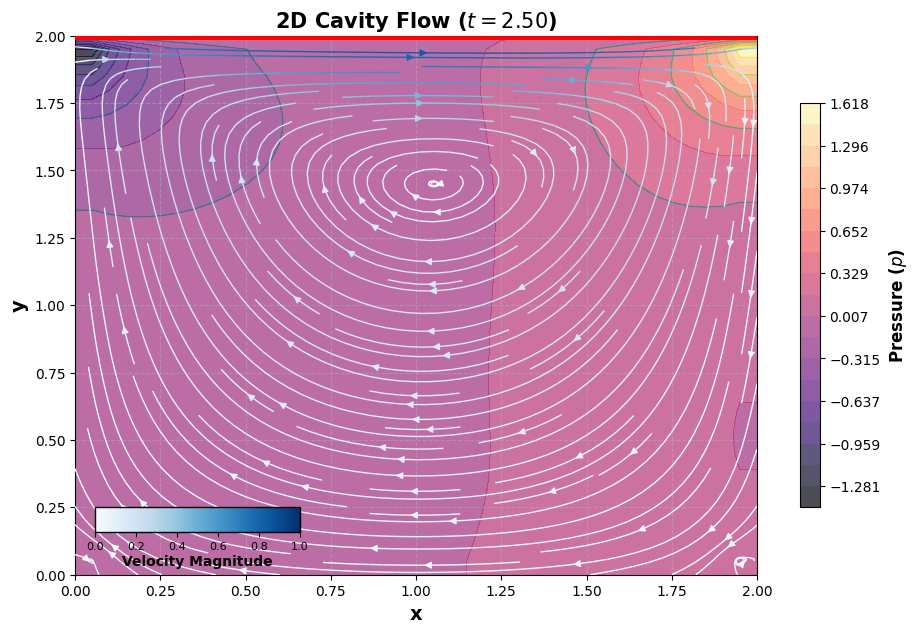

In [5]:
time_steps = 500

u, v, p = cavity_flow(p, u, v, dx, dy, dt, time_steps, rho, nu)

fig = plt.figure(figsize=(11, 7), dpi=100)
ax = plt.gca()
levels = np.linspace(np.min(p), np.max(p), 20) 
pressure_1 = ax.contourf(X, Y, p, levels=levels, alpha=0.7, cmap='magma', zorder=1)
pressure_2 = ax.contour(X, Y, p, levels=levels[::2], linewidths=0.8, alpha=0.9, zorder=2)
velocity_magnitude = np.sqrt(u**2 + v**2)
stream = ax.streamplot(X, Y, u, v, density=1.5, linewidth=1, color=velocity_magnitude, cmap='Blues', zorder=3)
plt.title(rf'2D Cavity Flow ($t={time_steps*dt:.2f}$)', fontweight='bold', fontsize=15)
plt.ylim(0, 2)
plt.xlabel('x', fontsize=14, fontweight='bold')
plt.ylabel('y', fontsize=14, fontweight='bold')
ax.plot([0, 2], [2, 2], color='red', linewidth=5, zorder=5)
ax.grid(True, linestyle='--', alpha=0.5, zorder=0)
cbar = plt.colorbar(pressure_1, pad=0.05, shrink=0.75)
cbar.set_label('Pressure ($p$)', fontsize=12, fontweight='bold')
cbar.ax.tick_params(labelsize=10)
cbar_ax = inset_axes(ax, width="20%", height="3%", loc='lower left', bbox_to_anchor=(0.03, 0.08, 1.5, 1.5), bbox_transform=ax.transAxes, borderpad=0)
cbar_stream = fig.colorbar(stream.lines, cax=cbar_ax, orientation='horizontal')
cbar_stream.set_label('Velocity Magnitude', fontsize=10, labelpad=2, fontweight='bold')
cbar_stream.ax.tick_params(labelsize=8)
cbar_stream.outline.set_linewidth(1)

plt.show()

Now the animation, sponsored by Claude by Anthropic (smashed my head trying to make it myself) a little of vibe-coding hurts no one

In [1]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

x_points = 41
y_points = 41
grid_length = 2
time_steps = 500
save_every = 10  # Save every 10 steps for animation
frames = time_steps // save_every
pseudo_time_steps = 50
dt = .005
dx = grid_length / (x_points - 1)
dy = grid_length / (y_points - 1)
rho = 1
nu = .1

x = np.linspace(0, grid_length, x_points)
y = np.linspace(0, grid_length, y_points)
X, Y = np.meshgrid(x, y)

u = np.zeros((y_points, x_points))
u_n = u.copy()

v = np.zeros((y_points, x_points))
v_n = v.copy()

p = np.zeros((y_points, x_points)) 
p_n = p.copy()

def solver_poisson(dx, dy, dt, u, v, p, rho):
    p_n = p.copy()

    for i in range(pseudo_time_steps):
        p[1:-1, 1:-1] = ((((p[1:-1, 2:] + p[1:-1, :-2])*(dy**2) + (p[2:, 1:-1] + p[:-2, 1:-1])*(dx**2)) / (2 * ((dx**2) + (dy**2))))
                        - ((rho * (dx**2) * (dy**2)) / (2 * ((dx**2) + (dy**2))))
                        * ((1/dt) * (((u[1:-1, 2:] - u[1:-1, :-2]) / (2*dx)) + ((v[2:, 1:-1] - v[:-2, 1:-1]) / (2*dy)))
                            - ((u[1:-1, 2:] - u[1:-1, :-2]) / (2*dx))**2
                            - 2 * ((u[2:, 1:-1] - u[:-2, 1:-1]) / (2*dy)) * ((v[1:-1, 2:] - v[1:-1, :-2]) / (2*dx))
                            - ((v[2:, 1:-1] - v[:-2, 1:-1]) / (2*dy))**2)) 
        
        p[:, -1] = p[:, -2]     # dp/dx = 0 at x = 2
        p[0, :] = p[1, :]       # dp/dy = 0 at y = 0
        p[:, 0] = p[:, 1]       # dp/dx = 0 at x = 0
        p[-1, :] = 0            # p = 0 at y = 2
    
    return p

def cavity_flow_with_history(p, u, v, dx, dy, dt, time_steps, rho, nu, save_every):
    # Arrays to store data for animation
    u_history = []
    v_history = []
    p_history = []
    
    for n in range(time_steps):
        u_n = u.copy()
        v_n = v.copy()
        p = solver_poisson(dx, dy, dt, u, v, p, rho)

        u[1:-1, 1:-1] = (u_n[1:-1, 1:-1]
                         - u_n[1:-1, 1:-1] * (dt/dx) * (u_n[1:-1, 1:-1] - u_n[1:-1, :-2])
                         - v_n[1:-1, 1:-1] * (dt/dx) * (u_n[1:-1, 1:-1] - u_n[:-2, 1:-1])
                         - (dt / (rho*2*dx)) * ((p[1:-1, 2:] - p[1:-1, :-2]))
                         + nu * (((dt/(dx**2)) * (u_n[1:-1, 2:] - 2*u_n[1:-1, 1:-1] + u_n[1:-1, :-2]))
                                 + ((dt/(dy**2)) * (u_n[2:, 1:-1] - 2*u_n[1:-1, 1:-1] + u_n[:-2, 1:-1]))))
        
        v[1:-1, 1:-1] = (v_n[1:-1, 1:-1]
                         - u_n[1:-1, 1:-1] * (dt/dx) * (v_n[1:-1, 1:-1] - v_n[1:-1, :-2])
                         - v_n[1:-1, 1:-1] * (dt/dx) * (v_n[1:-1, 1:-1] - v_n[:-2, 1:-1])
                         - (dt / (rho*2*dx)) * ((p[2:, 1:-1] - p[:-2, 1:-1]))
                         + nu * (((dt/(dx**2)) * (v_n[1:-1, 2:] - 2*v_n[1:-1, 1:-1] + v_n[1:-1, :-2]))
                                 + ((dt/(dy**2)) * (v_n[2:, 1:-1] - 2*v_n[1:-1, 1:-1] + v_n[:-2, 1:-1]))))       

        u[0, :]  = 0
        u[:, 0]  = 0
        u[:, -1] = 0
        u[-1, :] = 1    
        v[0, :]  = 0
        v[-1, :] = 0
        v[:, 0]  = 0
        v[:, -1] = 0
        
        # Save data for animation every save_every steps
        if n % save_every == 0:
            u_history.append(u.copy())
            v_history.append(v.copy())
            p_history.append(p.copy())
    
    return u_history, v_history, p_history

# Run simulation and collect history for animation
u_history, v_history, p_history = cavity_flow_with_history(p, u, v, dx, dy, dt, time_steps, rho, nu, save_every)

# Set up the figure and axes first - more explicit layout control
fig = plt.figure(figsize=(10, 7), dpi=100)
ax = fig.add_subplot(111)

# Adjust the figure margins to avoid tight_layout issues
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

# Find global min and max pressure for consistent colormap
p_min = min([np.min(p) for p in p_history])
p_max = max([np.max(p) for p in p_history])
levels = np.linspace(p_min, p_max, 20)

# Calculate global velocity magnitude range
v_min = 0
v_max = max([np.max(np.sqrt(u**2 + v**2)) for u, v in zip(u_history, v_history)])

# Create static colorbars outside the animation function
# First, create initial plots that will be updated
initial_contourf = ax.contourf(X, Y, p_history[0], levels=levels, 
                           alpha=0.7, cmap='magma', zorder=1)

velocity_magnitude = np.sqrt(u_history[0]**2 + v_history[0]**2)
initial_streamplot = ax.streamplot(X, Y, u_history[0], v_history[0], 
                             density=1.5, linewidth=1, color=velocity_magnitude, 
                             cmap='Blues', zorder=3, norm=plt.Normalize(v_min, v_max))

# Pressure colorbar - create once
cbar = fig.colorbar(initial_contourf, ax=ax, pad=0.05, shrink=0.75)
cbar.set_label('Pressure ($p$)', fontsize=12, fontweight='bold')
cbar.ax.tick_params(labelsize=10)

# Velocity magnitude colorbar - create once
cbar_ax = inset_axes(ax, width="20%", height="3%", loc='lower left', 
                   bbox_to_anchor=(0.03, 0.08, 1.5, 1.5), 
                   bbox_transform=ax.transAxes, borderpad=0)
cbar_stream = fig.colorbar(initial_streamplot.lines, cax=cbar_ax, orientation='horizontal')
cbar_stream.set_label('Velocity Magnitude', fontsize=10, labelpad=2, fontweight='bold')
cbar_stream.ax.tick_params(labelsize=8)
cbar_stream.outline.set_linewidth(1)

# Now clear the axis for the animation
ax.clear()

# Function to update the plot for each animation frame
def update(frame):
    # Clear the axis but keep the figure and colorbars
    ax.clear()
    
    # Redraw everything except colorbars
    contourf = ax.contourf(X, Y, p_history[frame], levels=levels, 
                          alpha=0.7, cmap='magma', zorder=1)
    
    contour = ax.contour(X, Y, p_history[frame], levels=levels[::2], 
                        linewidths=0.8, alpha=0.9, zorder=2)
    
    velocity_magnitude = np.sqrt(u_history[frame]**2 + v_history[frame]**2)
    streamplot = ax.streamplot(X, Y, u_history[frame], v_history[frame], 
                             density=1.5, linewidth=1, color=velocity_magnitude, 
                             cmap='Blues', zorder=3, norm=plt.Normalize(v_min, v_max))
    
    # Add moving lid indicator (red line)
    ax.plot([0, 2], [2, 2], color='red', linewidth=5, zorder=5)
    
    # Grid
    ax.grid(True, linestyle='--', alpha=0.5, zorder=0)
    
    # Title and axes labels
    ax.set_title(rf'2D Cavity Flow ($t={frame*save_every*dt:.2f}$)', 
                fontweight='bold', fontsize=15)
    
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    ax.set_xlabel('x', fontsize=14, fontweight='bold')
    ax.set_ylabel('y', fontsize=14, fontweight='bold')
    
    # Return updated artists
    return ax.get_children()

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(u_history), interval=100, blit=False)

# Save animation
writer = PillowWriter(fps=10)
ani.save('2D_Cavity_flow.gif', writer=writer)

plt.close()

print("Animation saved as 'cavity_flow_animation.gif'")

Animation saved as 'cavity_flow_animation.gif'
